In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy import units as u
plt.ion()
import os

In [12]:
a = [23, 56, 2, 4, 3]
b= np.mean(a)
print(b)

17.6


In [13]:
t = Table.read("./hst_results_nd.fits")
ra = t["RA"]
dec = t["DEC"]
av = t["Av_p50"]
age = t["logA_p50"]
mass = t["M_ini_p50"]
temp = t["logt_p50"]
f475w = t["F475W_VEGA"]
f814w = t["F814W_VEGA"]
#t[0].colnames

KeyError: 'logt_p50'

In [ ]:
young_stars = t[age < 8.5]
old_stars = t[age > 10]
print(len(young_stars))
print(len(old_stars))
plt.figure()
plt.plot(f475w - f814w, f475w, '.', color='gray', ls='', label='all stars')
plt.ylim(26.5, 17.3)
plt.plot(young_stars["F475W_VEGA"] - young_stars["F814W_VEGA"], young_stars["F475W_VEGA"], 
         'b.', ls='', label='log(age) < 8.5 dex')
plt.plot(old_stars["F475W_VEGA"] - old_stars["F814W_VEGA"], old_stars["F475W_VEGA"], 
         'r.', ls='', label='log(age) > 10 dex')
plt.legend()
plt.savefig("cmd_by_age.pdf")

In [ ]:
plt.figure()
# A(V) max = 5, -> limit to 1.5
cb = plt.scatter(ra, dec, c=av, marker='.', cmap='magma', vmin=0, vmax=1.5)
plt.colorbar(cb, label='A(V) [mag]')
plt.xlabel("RA", fontsize=14)
plt.ylabel("DEC", fontsize=14)
plt.savefig("lmc_av_spatial.pdf")

In [6]:
dist=t["distance_p50"]

49.806221103883765


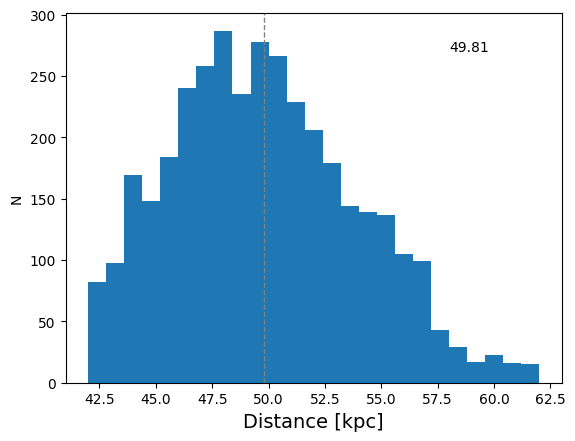

In [7]:
plt.figure()
plt.hist(dist/1000, bins=25)
plt.xlabel("Distance [kpc]", fontsize=14)
plt.ylabel("N")
d_mean = np.mean(dist/1000)
print(d_mean)
plt.axvline(d_mean, color='gray', ls='--', lw=1)
plt.text(58, 270, '%s' % np.around(d_mean, decimals=2))
plt.savefig("lmc_dist_hist.pdf")

In [8]:
f = "hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits"
cat = Table.read(f)

In [9]:
#t[0].colnames
f475 = cat["F475W_VEGA"]
f814 = cat["F814W_VEGA"]

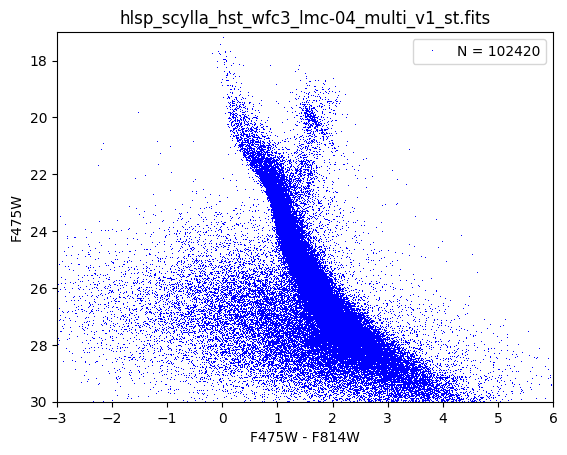

In [10]:
col = f475 - f814
mag = f475
n = len(f475)

plt.figure()
plt.plot(col, mag, ',b', ls='', label='N = %s' % n)
plt.legend()
plt.xlim(-3,6)
plt.ylim(30, 17)
plt.xlabel('F475W - F814W')
plt.ylabel('F475W')
plt.title('%s' % f)
plt.savefig("cmd_lmc4.png")